<a href="https://colab.research.google.com/github/azzazhr/Machine_Learning/blob/main/Jobsheet11_Klasifikasi2(SVM)ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Nama : Azzahra Attaqina**

### **NIM  : 2341720224**

### **Kelas : TI-3B**

**JOBSHEET 11 - KLASIFIKASI SUPPORT VECTOR MACHINE - SVM**

# **PRAKTIKUM 1**

# **Langkah 1 - Import Library**

In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
from google.colab import drive
#Mount Google Drive
drive.mount('/content/drive')

folder_path='/content/drive/MyDrive/DATAML_AZZA/mouse_viral_study.csv'
dpath=folder_path
data = pd.read_csv(dpath)
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


# **Langkah 2 - Membuat Data Dummy**

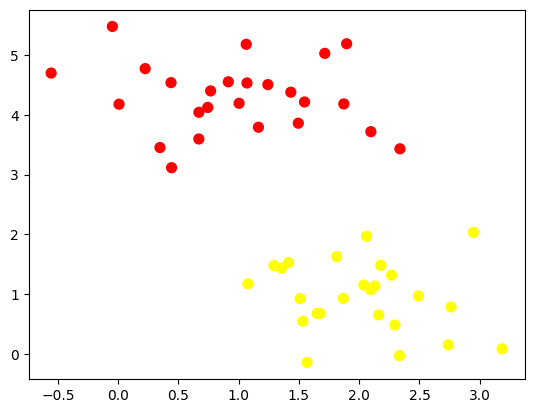

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

# **Langkah 3 - Buat Ilustrasi Garis Pemisah**

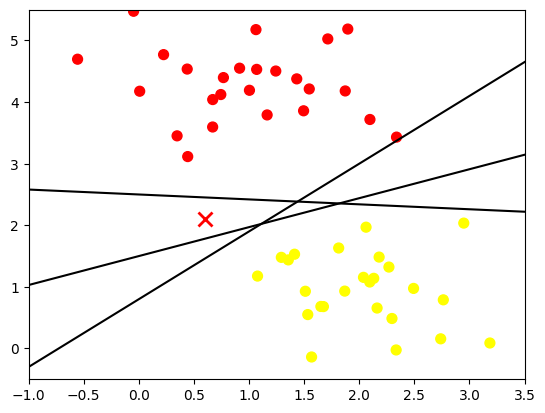

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

# Tambahan: Membuat data untuk 3 garis pemisah
# Kita buat satu set nilai x dari -1 sampai 3.5
xfit = np.linspace(-1, 3.5)

# Tambahan: Menggambar 3 garis lurus (y = mx + c)
# Garis-garis ini dipilih secara manual agar mirip dengan gambar Anda
plt.plot(xfit, 1.1 * xfit + 0.8, '-k')  # Garis 1 (paling curam)
plt.plot(xfit, 0.47 * xfit + 1.5, '-k') # Garis 2 (tengah)
plt.plot(xfit, -0.08 * xfit + 2.5, '-k') # Garis 3 (paling datar)

# Tambahan: Menambahkan tanda 'X' yang salah klasifikasi
plt.plot(0.6, 2.1, 'x', color='red', markersize=10, markeredgewidth=2)

# Mengatur batas plot agar sesuai gambar
plt.xlim(-1, 3.5)
plt.ylim(-0.5, 5.5)

plt.show()

# **Langkah 4 - Ilustrasi Margin**

(-1.0, 3.5)

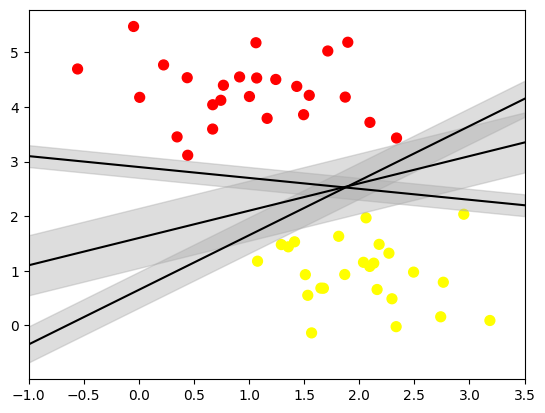

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

# **Langkah 5 - Fitting Model**

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

**Buat Fungsi Untuk Membantu Visualisasi Hasil FIt Model**

In [ ]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

**Lakukan Plotting dengan Fungsi Yang Telah DIbuat**

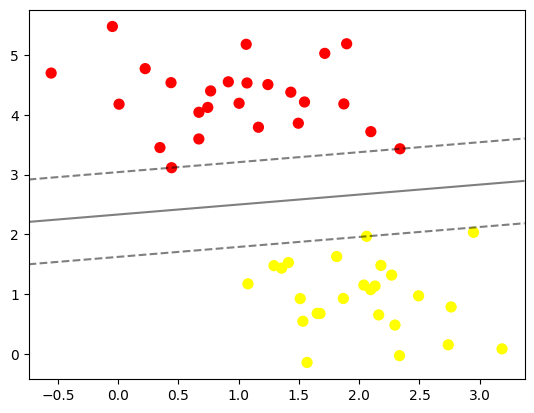

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

**Beberapa titik data yang menyentuh (masuk ke area) garis disebut sebagai support vector. Untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_**

In [ ]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

**Hasil fitting merupakan kunci keberhasilan suatu classifier (yang hanya dilihat dari posisi dari support vector). Data-data lain yang berada jauh dari margin dan tetap berada di area yang tepat tidak memiliki kemampuan untuk memodifikasi fitting (karena bukan support vector). Data-data tersebut tidak berkontribusi terhadap loss function yang digunakan untuk fitting model. Untuk lebih memahami hal ini, 60 dan 120 data awal digunakan sebagai contoh dalam bentuk perbandingan.**

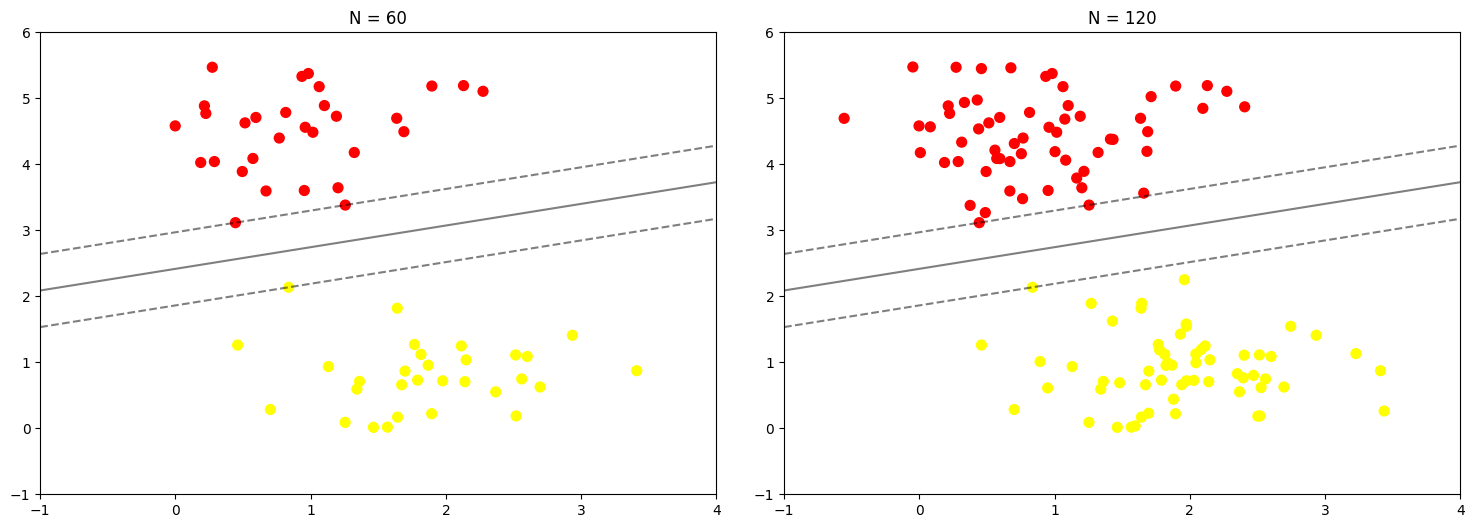

In [ ]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

**Berdasarkan hasil di atas, perubahan jumlah data tidak mempengaruhi model yang digunakan. Ilustrasi lebih jelas dapat dilihat pada diagram di bawah ini**

In [ ]:
# jumlah data dapat dipilih di antara 10 atau 200 buah data, telihat tidak ada perubahan pada model

from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

<function __main__.plot_svm(N=10, ax=None)>

# **PRAKTIKUM 2**

# **Langkah 1 - Ilustrasi Data Non-Linier**

# **Langkah 1a - Import Library**

In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC
from google.colab import drive
#Mount Google Drive
drive.mount('/content/drive')

folder_path='/content/drive/MyDrive/DATAML_AZZA/mouse_viral_study.csv'
dpath=folder_path
data = pd.read_csv(dpath)
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


# **Langkah 1b - Buat Kembali Fungsi Plotting**

In [ ]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

# **Langkah 1c - Buat Data Dummy Non-Linier**

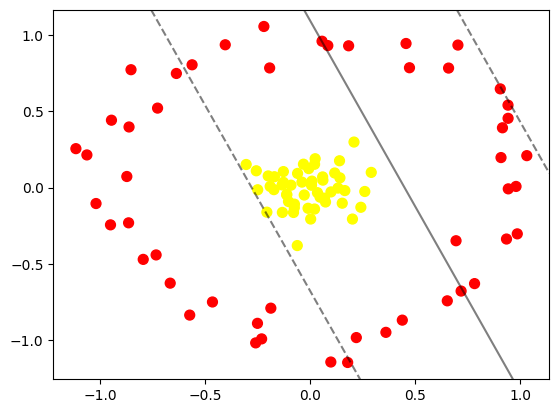

In [ ]:
# contoh data tidak terpisah secara linier
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

**Karena proyeksi radial tidak cukup menggunakan model 2D, maka plot visualisasi diubah menjadi model 3D.**

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-7.24165984e-02, -1.58589329e-01],
       [ 2.09359361e-02, -1.93390512e-01],
       [-3.32089617e-01, -1.31404489e-01],
       [-9.16494364e-01, -4.76752920e-02],
       [-6.10479499e-01,  7.48947437e-01],
       [-4.97847028e-02, -8.45636653e-02],
       [ 4.71960817e-01,  9.64046559e-01],
       [-7.99544365e-01,  5.79982976e-01],
       [-7.85869082e-01,  7.60736458e-01],
       [-1.24434465e-01, -1.15320679e-01],
       [ 6.80632426e-02,  8.95647046e-02],
       [ 9.13771413e-01, -2.04807855e-01],
       [ 2.38297199e-01, -4.51079623e-02],
       [ 9.09659205e-02, -1.53787655e-01],
       [-1.76303694e-01, -7.87835395e-02],
       [-7.32069348e-01, -6.01238292e-01],
       [ 1.08460540e+00, -3.81063358e-01],
       [ 8.47395140e-01,  1.70325517e-01],
       [-1.23818256e-02, -7.65791079e-02],
       [-1.39069650e-01,  3.89283155e-02],
       [ 7.33499692e-02, -2.40676086e-01],
       [ 4.51084979e-01, -1.15710281e+00],
       [ 1.17722176e-01,  1.04063806e-01],
       [-2.37769135e-02,  2.02277506e-01],
       [-9.74661362e-01,  8.02437778e-02],
       [ 4.28164496e-02, -2.66504869e-03],
       [-5.66019046e-01, -1.01847995e+00],
       [-7.83962513e-02,  2.08565916e-02],
       [ 1.23654530e-01,  6.90099616e-02],
       [ 7.32689643e-01,  4.83781701e-01],
       [-1.48485565e-02, -1.12992267e+00],
       [ 7.93773930e-01, -7.55046986e-01],
       [ 4.84711663e-02, -8.12791471e-03],
       [ 9.64538717e-02,  5.46331921e-02],
       [-8.16988956e-02, -2.12384834e-02],
       [-4.42523591e-01, -8.74374200e-01],
       [-2.64773099e-01, -4.39565226e-02],
       [ 2.92515440e-01,  1.00899634e+00],
       [ 5.28083805e-01,  7.55439430e-01],
       [ 1.46660503e-01, -7.71845717e-02],
       [-2.16691403e-01,  9.62261831e-01],
       [-4.81567772e-02, -2.14428122e-01],
       [-9.42353479e-01, -3.50949028e-01],
       [ 6.65780354e-01, -7.56749144e-01],
       [-9.09594787e-01, -2.04269999e-01],
       [-4.27913711e-02, -9.82402545e-02],
       [ 6.11960446e-02,  3.34951470e-02],
       [ 8.60685858e-02, -4.19385246e-02],
       [ 1.63257413e-01, -1.57302402e-02],
       [-8.89686760e-01, -2.55044235e-01],
       [-9.44518458e-02,  1.01294317e-01],
       [-9.88155885e-01,  2.87610509e-03],
       [-2.72170299e-01,  8.68151559e-01],
       [-6.16895227e-01,  8.18794037e-01],
       [ 3.56096747e-02, -1.29153001e-01],
       [-1.24047685e-02, -3.71002983e-02],
       [-9.76665934e-01,  3.59111983e-01],
       [ 8.07211705e-01,  5.41635230e-01],
       [ 8.74524948e-01,  3.00306576e-01],
       [-1.24372569e-01,  1.01045575e+00],
       [-2.04908889e-01, -2.00556271e-02],
       [ 8.56395695e-01, -3.97558703e-01],
       [ 2.12170742e-02, -2.19616501e-02],
       [-2.47695592e-01,  1.37450628e-01],
       [-8.66907720e-01, -4.07286209e-01],
       [ 2.44254225e-01,  1.52817498e-01],
       [ 6.73430428e-04, -4.24705463e-02],
       [-3.13683447e-01, -8.69099810e-01],
       [ 1.01888447e-01, -6.51680922e-02],
       [ 5.78218410e-03, -2.55349142e-02],
       [-1.20426399e-01, -2.75976575e-01],
       [ 6.14064943e-02,  9.73848223e-01],
       [ 6.83427962e-01,  6.68411351e-01],
       [ 3.63655214e-02,  8.96929036e-01],
       [ 2.80373156e-02,  1.20617943e-01],
       [-8.47270621e-02, -1.22877682e-01],
       [ 3.59353113e-02, -9.40435457e-01],
       [-9.68774134e-02,  2.01480091e-01],
       [ 3.51720803e-02, -7.51788620e-02],
       [ 1.09942150e+00, -1.80237201e-02],
       [ 2.66774225e-02, -1.08555923e-01],
       [-5.74649730e-01, -8.01933697e-01],
       [-6.61687068e-01, -7.90731010e-01],
       [ 5.96242120e-02, -3.70307812e-02],
       [-1.50654156e-02,  1.74002513e-01],
       [ 6.04468292e-01, -7.90640534e-01],
       [-1.08703540e-01,  4.72707178e-02],
       [ 9.40615274e-01,  1.85535515e-01],
       [-9.02582203e-01,  6.16544148e-01],
       [ 4.99117163e-01,  8.72820683e-01],
       [-5.16773357e-02, -2.51479042e-04],
       [ 3.64293775e-01, -9.73049142e-01

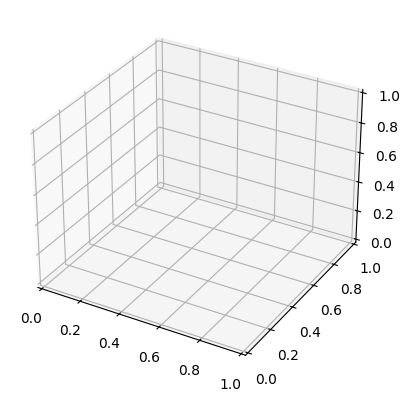

In [ ]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

# **Langkah 2 - Fitting Model**

In [ ]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

**Plot hasil decision boundaries dari kernel RBF**

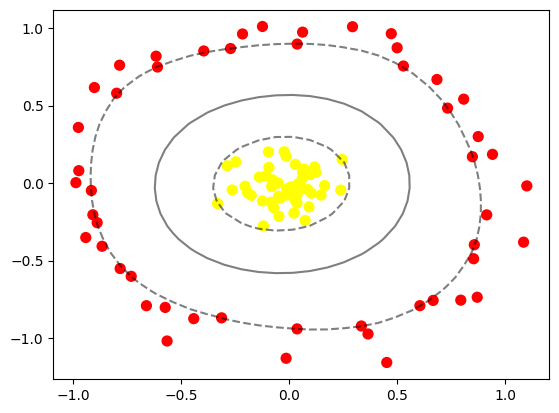

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

# **PRAKTIKUM 3**

# **Langkah 1 - Import Library dan Buat Fungsi Plotting**

In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
from google.colab import drive
#Mount Google Drive
drive.mount('/content/drive')

folder_path='/content/drive/MyDrive/DATAML_AZZA/mouse_viral_study.csv'
dpath=folder_path
data = pd.read_csv(dpath)
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [ ]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

# **Langkah 2 - Buat Data Dummy**

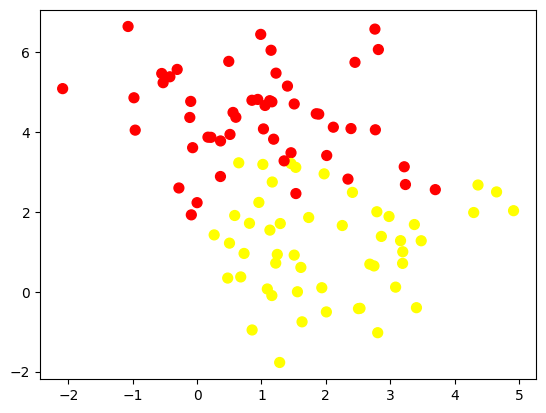

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

# **Langkah 3 - Analisis Dampak Tunning**

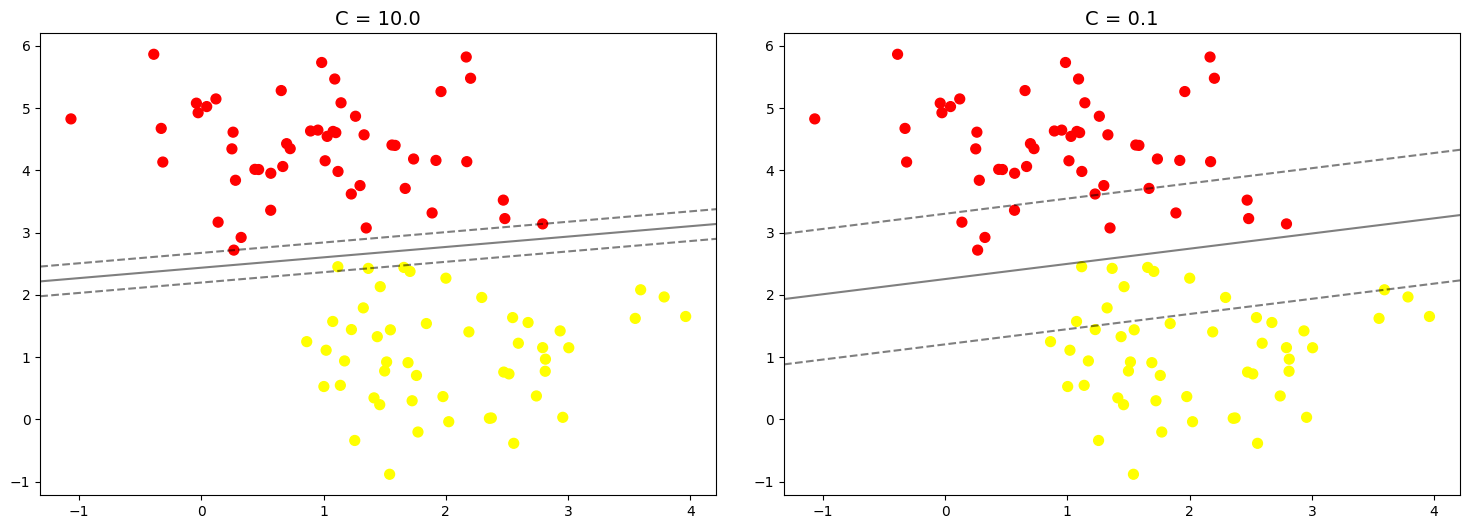

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

# **PRAKTIKUM 4**

# **Langkah 0 - Unduh Dataset**

**Dataset yang digunakan dapat diunduh secara langsung melalui scikit-learn.**

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


# **Langkah 1 - Inspeksi Citra Wajah**

**Lakukan inspeksi citra wajah yang akan digunakan.**

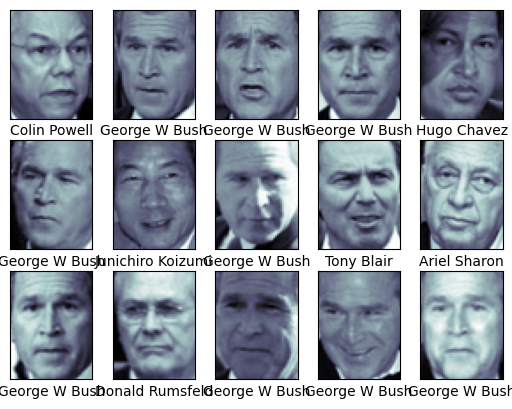

In [ ]:
# contoh wajah yang digunakan
from matplotlib import pyplot as plt

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

# **Langkah 2 - Pra Pengolahan Data**

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')

# Pipeline digunakan untuk melakukan proses secara bertahap dalam
# 1 eksekusi fungsi secara langsung
model = make_pipeline(pca, svc)

# **Langkah 3 - Split Data**

In [ ]:
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

# **Langkah 4 - Pembuatan Model + Tunning**

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: user 2min 14s, sys: 138 ms, total: 2min 14s
Wall time: 1min 28s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


**Gunakan model terbaik tersebut untuk proses prediksi.**

In [ ]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

# **Langkah 5 - Cek Hasil Prediksi**

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

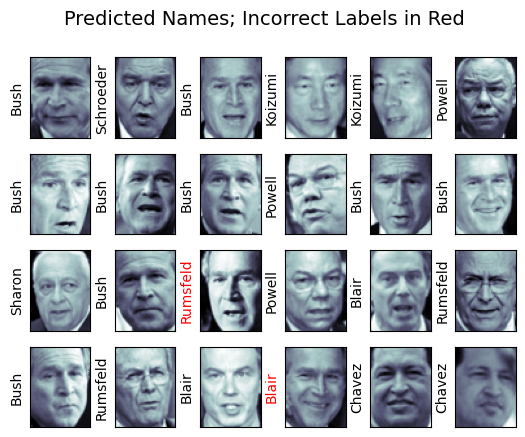

In [ ]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

# **Langkah 6 - Cek Performansi**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



**Selanjutnya, kita dapat menggunakan confusion matrix untuk mengetahui label label yang terklasifikasi  dengan benar dan tidak.**

Text(113.92222222222219, 0.5, 'predicted label')

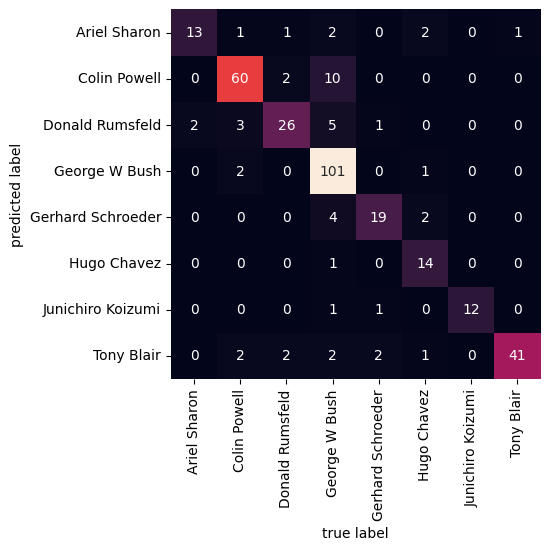

In [ ]:
# bentuk confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

# **PRAKTIKUM 5**

# **Langkah 0 - Import Library**

In [ ]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

!unzip /content/drive/MyDrive/DATAML_AZZA/images.zip -d /content/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Archive:  /content/drive/MyDrive/DATAML_AZZA/images.zip
replace /content/__MACOSX/._images? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/__MACOSX/._images  
  inflating: /content/__MACOSX/images/._test  
  inflating: /content/__MACOSX/images/._training  
  inflating: /content/__MACOSX/images/test/._day  
  inflating: /content/__MACOSX/images/test/._night  
  inflating: /content/__MACOSX/images/training/._day  
  inflating: /content/__MACOSX/images/training/._night  
  inflating: /content/images/test/day/20151102_122322.jpg  
  inflating: /content/__MACOSX/images/test/day/._20151102_122322.jpg  
  inflating: /content/images/test/day/20151101_235039.jpg  
  inflating: /content/__MACOSX/images/test/day/._20151101_235039.jpg  
  inflating: /content/images/test/day/20151102_114041.jpg  
  inflating: /content/__MACOSX/images/test/day/._20151102_114

**Lakukan ekstraksi data gambar, kemudian definisikan lokasi gambar. Pada contoh ini, folder gambar berlokasi sama dengan lokasi file python.**

In [ ]:
# Image directories
train_dir = "images/training/"
test_dir = "images/test/"

# **Langkah 1 - Load Data dan Visualisasikan**

In [ ]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

**Load gambar training**

In [ ]:
# Load training data
train_img = load_dataset(train_dir)

**Lakukan pengecekan pada salah satu data pada list. List harus berisi tuple dengan dua data, yaitu data gambar dan label dari gambar.**

In [ ]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

(array([[[ 94, 117, 161],
         [ 94, 117, 161],
         [ 94, 117, 161],
         ...,
         [143, 160, 190],
         [143, 160, 190],
         [143, 160, 190]],
 
        [[ 95, 118, 162],
         [ 95, 118, 162],
         [ 95, 118, 162],
         ...,
         [144, 161, 191],
         [144, 161, 191],
         [145, 162, 192]],
 
        [[ 96, 119, 163],
         [ 96, 119, 163],
         [ 95, 118, 162],
         ...,
         [142, 159, 189],
         [143, 160, 190],
         [145, 162, 192]],
 
        ...,
 
        [[167,  82,  77],
         [169,  84,  77],
         [171,  86,  79],
         ...,
         [ 36,  38,  37],
         [ 41,  43,  42],
         [ 34,  36,  35]],
 
        [[166,  81,  76],
         [167,  82,  75],
         [170,  85,  78],
         ...,
         [ 32,  34,  33],
         [ 38,  40,  39],
         [ 33,  35,  34]],
 
        [[172,  84,  80],
         [173,  86,  79],
         [174,  87,  80],
         ...,
         [ 35,  37,  36],
  

**Cek ukuran gambar secara acak**

In [ ]:
# Random size checking
pick_random = np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 127
(700, 1280, 3)


**Tampilkan gambar untuk inspeksi secara visual. Buatlah fungsi untuk membantu memvisualkan gambar**

In [ ]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

**Lakukan visualisasi gambar secara acak**

Shape	: (469, 640, 3)
Label	: day


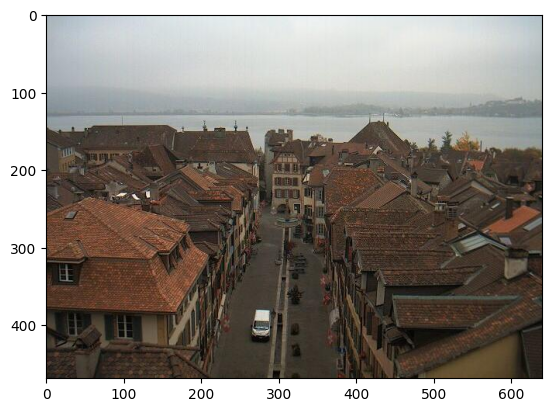

In [ ]:
random_img_viz(train_img)

# **Langkah 3 - Pra Pengolahan Data**

**Buatlah fungsi berikut untuk menstandarkan ukuran gambar.**

In [ ]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

**Selanjutnya, buatlah fungsi untuk kebutuhan encoding label.**

In [ ]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

**Terakhir, buatlah fungsi untuk melakukan kedua hal tersebut secara sekaligus untuk semua gambar dalam list.**

In [ ]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

**Lakukan pra pengolahan data pada data training.**

In [ ]:
train_std_img_list = preprocess(train_img)

**Lakukan pengecekan ukuran gambar secara acak.**

In [ ]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 220
(600, 1100, 3)


# **Langkah 4 - Ekstraksi Fitur**

**Buatlah fungsi berikut untuk mendapatkan nilai rata-rata tingkat kecerahan.**

In [ ]:
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rb value which is the V channel
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

**Lakukan pengecekan pada gambar secara acak. INGAT! Gunakan gambar yang telah melalui proses pra pengolahan data!**

Image 120
Avg Brighness: 114.7363


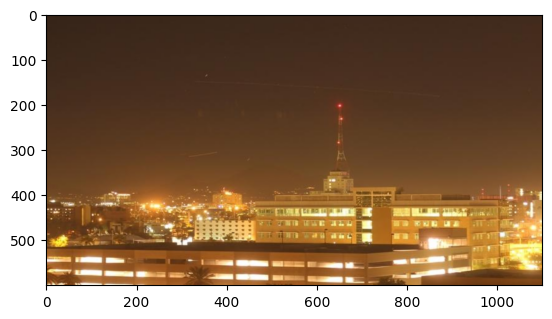

In [ ]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)

# **Langkah 5 - Klasifikasi dengan Metode Threshold**

In [ ]:
def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1

    return pred

**Lakukan pengecekan prediksi secara acak pada data training**

Image 127
Actual label: 0
Predicted label: 0


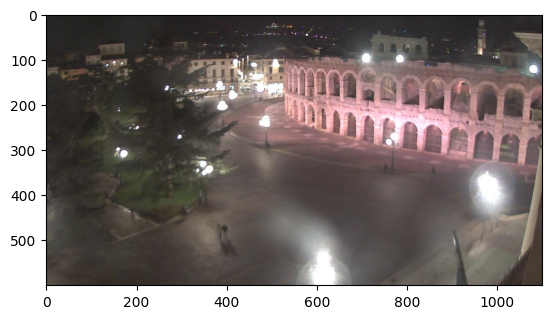

In [ ]:
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

# **Langkah 6 - Evaluasi Manual**

In [ ]:
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label:
            miss_labels.append((img, pred_label, label))

    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

**Lakukan evaluasi pada data training dengan nilai ambang batas 120.**

In [ ]:
# Evaluate on train data
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.8417


**Selanjutnya, kita akan melakukan evaluasi pada data testing. Namun sebelumnya, data testing harus diperlakukan sama dengan data training dalam konteks pra progolahan data dan ekstraksi fitur.**

In [ ]:
# Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)

# Preprocess
test_std_img_list = preprocess(test_img)

# Predict
evaluate(test_std_img_list, threshold=120)

Accuracy: 0.8688


# **Klasifikasi dengan SVM**

# **Langkah 4 Alternatif - Membuat Feature Vectors.**

In [ ]:
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)
        labels.append(img_label)

    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

**Cek hasilnya pada data training,**

In [ ]:
# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,133.358391,1.0
1,107.650714,1.0
2,128.610358,1.0
3,164.555174,1.0
4,127.087353,1.0


**Lakukan langkah yang serupa pada data testing**

In [ ]:
# Do the same thing on test data
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,117.273579,1.0
1,109.960342,1.0
2,98.868853,1.0
3,144.243461,1.0
4,157.186358,1.0


# **Langkah 5 - Buat Model SVM**

**Kita akan membuat model SVM dengan kernel RBF (default) dengan memanfaatkan libary scikit-learn.**

In [ ]:
# import requied library
from sklearn.svm import SVC

# Split data and label
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
y_test = test_avg_img.iloc[:,1]

model = SVC()
model.fit(X_train, y_train)

SVC()

# **Langkah 6 - Evaluasi**

**Kita akan melakukan evaluasi pada data training dan testing dengan bantuan library scikit-learn.**

In [ ]:
from sklearn.metrics import accuracy_score

# Make a prediction on train data
y_train_pred = model.predict(X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Eval Result
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.8583333333333333
Accuracy on test: 0.9


# **TUGAS PRAKTIKUM**

1. Buatlah model SVM dengan menggunakan data voice.csv dengan ketentuan,

    a. Split data dengan rasio 70:30 dan 80:20 untuk setiap model yang akan dibangun.

    - Gunakan model dengan kernel linier.

    - Gunakan model dengan kernel polynomial.

    - Gunakan model dengan kernel RBF.

    b. Tabulasikan performansi setiap split dan kernel berdasarkan metrik akurasi.

2. Gunakan data pada praktikum 5 untuk membuat model klasifikasi siang dan malam menggunakan SVM dengan kernel RBF menggunakan fitur histrogram. Gunakan rasio 80:20. Anda dapat bereksperimen dengan hyperparameter tunning dari kernel RBF. Catat performansi akurasinya!

# **TUGAS NO 1**

# **Langkah 1 - Import Library dan Load Data**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from google.colab import drive
#Mount Google Drive
drive.mount('/content/drive')

folder_path='/content/drive/MyDrive/DATAML_AZZA/voice.csv'
dpath=folder_path
data = pd.read_csv(dpath)
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


# **Langkah 2 - Pra Pengolahan Data & Encoding Label**

In [ ]:
# Pisahkan fitur (X) dan label (y)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Encode label (y) dari teks (misal: 'male', 'female') menjadi angka
le = LabelEncoder()
y = le.fit_transform(y)

# **Langkah 3 - Inisialisasi dengan Membuat Kedua Set Data Split**

In [ ]:
# Split 70:30
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X, y, test_size=0.3, random_state=42)

# Split 80:20
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X, y, test_size=0.2, random_state=42)

# List untuk menyimpan hasil
results_list = []
results_list = []

print("Data berhasil dimuat dan di-split.")
print(f"Bentuk data (X): {X.shape}")
print(f"Data Latih (70:30): {X_train_70.shape[0]} sampel")
print(f"Data Latih (80:20): {X_train_80.shape[0]} sampel")

Data berhasil dimuat dan di-split.
Bentuk data (X): (3168, 20)
Data Latih (70:30): 2217 sampel
Data Latih (80:20): 2534 sampel


# **Langkah 4 - Melakukan Tunning (Model Kernel Linier) TUGAS 1a**

In [ ]:
print("=== Model Dengan Kernel Linear ===")

# --- Model Linear 70:30 ---
model_linear_70 = SVC(kernel='linear')
model_linear_70.fit(X_train_70, y_train_70)
y_pred_linear_70 = model_linear_70.predict(X_test_70)
acc_linear_70 = accuracy_score(y_test_70, y_pred_linear_70)

results_list.append({
    'Split Ratio (Train:Test)': '70:30',
    'Kernel': 'linear',
    'Accuracy': acc_linear_70
})
print(f"  > Akurasi (70:30) Linear: {acc_linear_70:.4f}")

# --- Model Linear 80:20 ---
model_linear_80 = SVC(kernel='linear')
model_linear_80.fit(X_train_80, y_train_80)
y_pred_linear_80 = model_linear_80.predict(X_test_80)
acc_linear_80 = accuracy_score(y_test_80, y_pred_linear_80)

results_list.append({
    'Split Ratio (Train:Test)': '80:20',
    'Kernel': 'linear',
    'Accuracy': acc_linear_80
})
print(f"  > Akurasi (80:20) Linear: {acc_linear_80:.4f}")
print("Selesai (Kernel: Linear).")

=== Model Dengan Kernel Linear ===
  > Akurasi (70:30) Linear: 0.9264
  > Akurasi (80:20) Linear: 0.9416
Selesai (Kernel: Linear).


# **Langkah 5 - Melakukan Tunning (Model Kernel Polynomial) TUGAS 1a**

In [ ]:
print("=== Model Dengan Kernel Polynomial ===")

# --- Model Poly 70:30 ---
model_poly_70 = SVC(kernel='poly')
model_poly_70.fit(X_train_70, y_train_70)
y_pred_poly_70 = model_poly_70.predict(X_test_70)
acc_poly_70 = accuracy_score(y_test_70, y_pred_poly_70)

results_list.append({
    'Split Ratio (Train:Test)': '70:30',
    'Kernel': 'poly',
    'Accuracy': acc_poly_70
})
print(f"  > Akurasi (70:30) Poly: {acc_poly_70:.4f}")

# --- Model Poly 80:20 ---
model_poly_80 = SVC(kernel='poly')
model_poly_80.fit(X_train_80, y_train_80)
y_pred_poly_80 = model_poly_80.predict(X_test_80)
acc_poly_80 = accuracy_score(y_test_80, y_pred_poly_80)

results_list.append({
    'Split Ratio (Train:Test)': '80:20',
    'Kernel': 'poly',
    'Accuracy': acc_poly_80
})
print(f"  > Akurasi (80:20) Poly: {acc_poly_80:.4f}")
print("Selesai (Kernel: Polynomial).")

=== Model Dengan Kernel Polynomial ===
  > Akurasi (70:30) Poly: 0.4900
  > Akurasi (80:20) Poly: 0.4826
Selesai (Kernel: Polynomial).


# **Langkah 6 - Melakukan Tunning (Model Kernel RBF) TUGAS 1a**

In [ ]:
print("=== Model Dengan Kernel RBF ===")

# --- Model RBF 70:30 ---
model_rbf_70 = SVC(kernel='rbf')
model_rbf_70.fit(X_train_70, y_train_70)
y_pred_rbf_70 = model_rbf_70.predict(X_test_70)
acc_rbf_70 = accuracy_score(y_test_70, y_pred_rbf_70)

results_list.append({
    'Split Ratio (Train:Test)': '70:30',
    'Kernel': 'rbf',
    'Accuracy': acc_rbf_70
})
print(f"  > Akurasi (70:30) RBF: {acc_rbf_70:.4f}")

# --- Model RBF 80:20 ---
model_rbf_80 = SVC(kernel='rbf')
model_rbf_80.fit(X_train_80, y_train_80)
y_pred_rbf_80 = model_rbf_80.predict(X_test_80)
acc_rbf_80 = accuracy_score(y_test_80, y_pred_rbf_80)

results_list.append({
    'Split Ratio (Train:Test)': '80:20',
    'Kernel': 'rbf',
    'Accuracy': acc_rbf_80
})
print(f"  > Akurasi (80:20) RBF: {acc_rbf_80:.4f}")
print("Selesai (Kernel: RBF).")

=== Model Dengan Kernel RBF ===
  > Akurasi (70:30) RBF: 0.6625
  > Akurasi (80:20) RBF: 0.6562
Selesai (Kernel: RBF).


# **Langkah 7 - Tabulasi Hasil (TUGAS 1b)**

In [ ]:
# Ubah list hasil menjadi DataFrame pandas
results_df = pd.DataFrame(results_list)

print("\n=== Tabulasi Performansi Model SVM (Tugas 1.b) ===")
# .to_markdown() akan mencetak tabel yang rapi
print(results_df.to_markdown(index=False, floatfmt=".4f"))


=== Tabulasi Performansi Model SVM (Tugas 1.b) ===
| Split Ratio (Train:Test)   | Kernel   |   Accuracy |
|:---------------------------|:---------|-----------:|
| 70:30                      | linear   |     0.9264 |
| 80:20                      | linear   |     0.9416 |
| 70:30                      | linear   |     0.9264 |
| 80:20                      | linear   |     0.9416 |
| 70:30                      | poly     |     0.4900 |
| 80:20                      | poly     |     0.4826 |
| 70:30                      | rbf      |     0.6625 |
| 80:20                      | rbf      |     0.6562 |


# **TUGAS NO 2**

# **Langkah 1 - Import Library**

In [ ]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

!unzip /content/drive/MyDrive/DATAML_AZZA/images.zip -d /content/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Archive:  /content/drive/MyDrive/DATAML_AZZA/images.zip
replace /content/__MACOSX/._images? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/__MACOSX/._images  
  inflating: /content/__MACOSX/images/._test  
  inflating: /content/__MACOSX/images/._training  
  inflating: /content/__MACOSX/images/test/._day  
  inflating: /content/__MACOSX/images/test/._night  
  inflating: /content/__MACOSX/images/training/._day  
  inflating: /content/__MACOSX/images/training/._night  
  inflating: /content/images/test/day/20151102_122322.jpg  
  inflating: /content/__MACOSX/images/test/day/._20151102_122322.jpg  
  inflating: /content/images/test/day/20151101_235039.jpg  
  inflating: /content/__MACOSX/images/test/day/._20151101_235039.jpg  
  inflating: /content/images/test/day/20151102_114041.jpg  
  inflating: /content/__MACOSX/images/test/day/._20151102_114

**Lakukan ekstraksi data gambar, kemudian definisikan lokasi gambar. Pada contoh ini, folder gambar berlokasi sama dengan lokasi file python.**

In [ ]:
# Image directories
train_dir = "images/training/"
test_dir = "images/test/"

# **Langkah 2 - Load Data dan Visualisasikan**

In [ ]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

# **Langkah 3 - Pra Pengolahan Data**

**Buatlah fungsi berikut untuk menstandarkan ukuran gambar.**

In [ ]:
def standardized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100, 600))
    return std_img

**Selanjutnya, buatlah fungsi untuk kebutuhan encoding label.**

In [ ]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

**buatlah fungsi untuk menampilkan gambar random**

In [ ]:
def random_img_viz(img_list):
    # Ambil satu gambar acak
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label_str = img_list[rand_num][1] # Label masih 'day' or 'night'

    # Tampilkan gambar
    print(f'\nMenampilkan Gambar Acak (Index: {rand_num})...')
    plt.imshow(img)
    plt.title(f"Label: {label_str} | Bentuk: {img.shape}")
    plt.axis('off') # Matikan sumbu agar rapi
    plt.show()

# **Langkah 4 - Ekstraksi Fitur**


**Fungsi berikut untuk mendapatkan fitur histogram**

In [ ]:
def extract_histogram(image):
    # Buat histogram 3D (untuk 3 channel RGB)
    # 8 bin per channel, total fitur = 8*8*8 = 512
    hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8],
                        [0, 256, 0, 256, 0, 256])

    # Normalisasi histogram
    cv2.normalize(hist, hist)

    # Ratakan (flatten) histogram menjadi 1D vector
    return hist.flatten()

# **Klasivikasi Dengan SVM**

# **Langkah 5 - Membuat Feature Vectors.**

Memuat data training...
Memuat data testing...
Total gambar digabungkan: 400

Menampilkan Gambar Acak (Index: 321)...


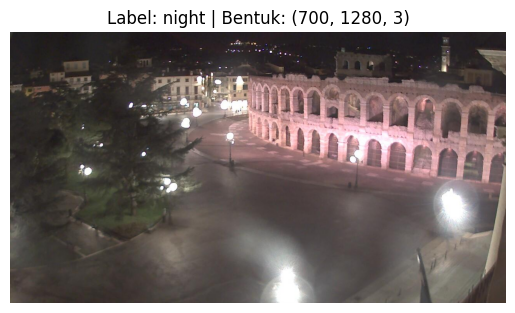

Memulai pra-pengolahan dan ekstraksi fitur histogram...
Ekstraksi fitur histogram selesai.
Bentuk data fitur (X): (400, 512)
Bentuk data label (y): (400,)


In [ ]:
# Load dan Gabungkan Data
print("Memuat data training...")
train_img = load_dataset(train_dir)
print("Memuat data testing...")
test_img = load_dataset(test_dir)

# Gabungkan semua data (train + test) untuk di-split ulang
all_images = train_img + test_img
print(f"Total gambar digabungkan: {len(all_images)}")

# Memanggil fungsi random image untuk cek data
if all_images:
    random_img_viz(all_images)
else:
    print("Tidak ada gambar untuk divisualisasikan.")

# Ekstraksi Fitur Histogram
X_features = []
y_labels = []

print("Memulai pra-pengolahan dan ekstraksi fitur histogram...")
for img, label_str in all_images:
    # 1. Standarkan ukuran
    std_img = standardized_input(img)

    # 2. Encode label
    img_label = label_encoder(label_str)

    # 3. Ekstraksi Fitur Histogram
    hist_features = extract_histogram(std_img)

    X_features.append(hist_features)
    y_labels.append(img_label)

print("Ekstraksi fitur histogram selesai.")

# Ubah ke Numpy Array
X = np.array(X_features)
y = np.array(y_labels)

print(f"Bentuk data fitur (X): {X.shape}")
print(f"Bentuk data label (y): {y.shape}")

# **Langkah 6 - Buat Model SVM**

In [ ]:
# Split Data (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Data di-split (80:20):")
print(f"Training: {len(X_train)} sampel | Testing: {len(X_test)} sampel")

# Buat Model SVM dengan Tuning
print("\nMemulai Hyperparameter Tuning (GridSearchCV)...")

svc = SVC(kernel='rbf') # Sesuai soal: kernel RBF

# Grid parameter untuk "eksperimen" (seperti P4)
param_grid = {
    'C': [1, 10, 50],
    'gamma': [0.001, 0.0005, 'scale']
}

# Buat model GridSearchCV
grid = GridSearchCV(svc, param_grid, cv=3, verbose=2)

# Fit Model
grid.fit(X_train, y_train)

print("\nModel SVM (RBF) dengan tuning telah di-fit.")

Data di-split (80:20):
Training: 320 sampel | Testing: 80 sampel

Memulai Hyperparameter Tuning (GridSearchCV)...
Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END ...................................C=1, gamma=0.001; total time=   0.1s
[CV] END ...................................C=1, gamma=0.001; total time=   0.1s
[CV] END ...................................C=1, gamma=0.001; total time=   0.0s
[CV] END ..................................C=1, gamma=0.0005; total time=   0.0s
[CV] END ..................................C=1, gamma=0.0005; total time=   0.0s
[CV] END ..................................C=1, gamma=0.0005; total time=   0.0s
[CV] END ...................................C=1, gamma=scale; total time=   0.0s
[CV] END ...................................C=1, gamma=scale; total time=   0.0s
[CV] END ...................................C=1, gamma=scale; total time=   0.0s
[CV] END ..................................C=10, gamma=0.001; total time=   0.0s
[CV] END .......

# **Langkah 7 - Evaluasi**

In [ ]:
# Dapatkan Model Terbaik dari Grid
print("Tuning selesai.")
best_model = grid.best_estimator_
print(f"Parameter terbaik yang ditemukan: {grid.best_params_}")

# Buat Prediksi
y_pred = best_model.predict(X_test)

# Catat Performansi Akurasi
accuracy = accuracy_score(y_test, y_pred)

print(f"\n=== Hasil Performa Model (Tugas 2) ===")
print(f"Akurasi pada data test (rasio 80:20) dengan fitur histogram adalah: {accuracy * 100:.4f}%")

Tuning selesai.
Parameter terbaik yang ditemukan: {'C': 10, 'gamma': 'scale'}

=== Hasil Performa Model (Tugas 2) ===
Akurasi pada data test (rasio 80:20) dengan fitur histogram adalah: 100.0000%
